# Imports 

To use the ActivationModule for instantiating ActivationFunctions after installing the repository, we need to first import the wanted ActivationFunction. In this case we use ReLU:

In [1]:
from activations.torch import ReLU

Afterwards, we import all the neccessary modules needed to create a Network and train/evaluate it:

In [2]:
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader as DL
import torch.nn as nn
from torch import optim
import torch

# Network creation with ActivationModule ReLU

Now we create an example Network, where we use our imported ActivationModule activation function to activate neurons. Additionally, we create save, load, train and an evaluation method for our example network in order to do everything we want to do with it: 

In [3]:
class MnistCNN(nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__()

        self.l1 = nn.Sequential(nn.Conv2d(
            in_channels=1,
            out_channels=16,
            kernel_size=5,
            stride=1,
            padding=2
            ),
            nn.MaxPool2d(kernel_size=2)
        )

        self.l2 = nn.Sequential(nn.Conv2d(
            in_channels=16,
            out_channels=32,
            kernel_size=5,
            stride=1,
            padding=2
            ),
            nn.MaxPool2d(2)
        )

        self.l3 = nn.Linear(32 * 7 * 7, 10)

        self.a1 = ReLU()
        self.a2 = ReLU()

    def forward(self, x):
        x = self.l1(x)
        x = self.a1(x)
        x = self.l2(x)
        x = self.a2(x)

        x = x.view(x.size(0), -1)
        output = self.l3(x)
        return output


def save_model(model, save_name):
    full_pth = f"./models/{save_name}"
    torch.save(model.state_dict(), full_pth)

def load_model(model_name, modeltype=MnistCNN, *args, **kwargs):
    model = modeltype(*args, **kwargs)
    model.load_state_dict(torch.load(f"./models/{model_name}"))
    return model

def train(epochs, model, trainDataLoader):
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    lossf = nn.CrossEntropyLoss()
    model.train()

    for epoch in range(epochs):
        epoch_loss = 0
        for (batch_image, batch_label) in trainDataLoader:
            output = model(batch_image)
            loss = lossf(output, batch_label)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        print(f"Loss at epoch {epoch} := {epoch_loss / len(trainDataLoader)}")


def eval(model, testDataLoader):
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in testDataLoader:
            test_output = model(images)
            model_pred = torch.max(test_output, 1)[1]
            acc = (model_pred == labels).sum().item()
            correct += acc
            total += labels.size(0)
        print(f"Accuracy is {correct / total}")

# Datasets

Now we can train this model on some train and evaluation datasets, in our case we will be using MNIST for training and FashionMNIST for evaluation of the model:

In [4]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True,
)
test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    transform = ToTensor(),
    download=True
)

trainLaoder = DL(train_data, batch_size=64, shuffle=True)
testLoader = DL(test_data, batch_size=64, shuffle=True)

# Visualizing an ActivationModule Activation Function

After initializing all needed parts of our data and network, we can now start using our ActivationModule tools to visualize input distributions of the instantiated Activation Functions of the Network. For this, we first state that we want so save all inputs that are perceived by an ReLU Activation Function of the ActivationModule: 

In [5]:
ReLU.save_all_inputs()

No instanciated function of ReLU found


--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.8/logging/__init__.py", line 440, in format
    return self._format(record)
  File "/usr/lib/python3.8/logging/__init__.py", line 436, in _format
    return self._fmt % record.__dict__
KeyError: 'filename_set'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/python3.8/logging/__init__.py", line 1085, in emit
    msg = self.format(record)
  File "/usr/lib/python3.8/logging/__init__.py", line 929, in format
    return fmt.format(record)
  File "/home/patrick/.local/lib/python3.8/site-packages/activation_functions-0.2.2-py3.8.egg/activations/utils/activation_logger.py", line 31, in format
    return formatter.format(record)
  File "/usr/lib/python3.8/logging/__init__.py", line 671, in format
    s = self.formatMessage(record)
  File "/usr/lib/python3.8/logging/__init__.py", line 640, in formatMessage
    return self._style.format(record

ValueError: 

Now we can run our Model on some data, either the training or evaluation data and visualize all instantiated ReLus. At the end we make sure that afterwards the inputs that flow through our ActivationModules are not captured anymore in visualisations:

Accuracy is 0.0897


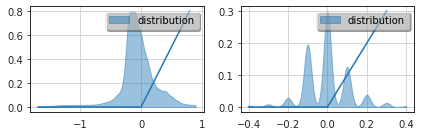

ActivationLogger: <function relu at 0x7fcd446483a0> | activation_logger.py | 54 | Not retrieving input anymore for showing
ActivationLogger: <function relu at 0x7fcd446483a0> | activation_logger.py | 54 | Not retrieving input anymore for showing
ActivationLogger: <function relu at 0x7fcd446483a0> | activation_logger.py | 54 | Not retrieving input anymore for showing
ActivationLogger: <function relu at 0x7fcd446483a0> | activation_logger.py | 54 | Not retrieving input anymore for showing


In [19]:
ReLU.save_all_inputs(category_name="eval")
eval(model, testLoader)
ReLU.show_all()
ReLU.save_all_inputs(saving=False)